In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.transforms import ScaledTranslation
%matplotlib inline

In [2]:
# Load results
df_fva = pd.read_excel('./results/FVA_RBA_bounds_processed_for_reversibility.xlsx')
df_fva.index = df_fva.rxn.to_list()

# Remove pseudoreaction
df_fva = df_fva[df_fva.subsystem != 'Pseudoreaction']
df_fva = df_fva[df_fva.subsystem != 'Transport']
df_fva = df_fva[df_fva.subsystem != 'Exchange']

# Handle reversible rxns with non-zero reverse flux
#df_fva = df_fva[(df_fva.fva_max > 0) | (df_fva.fva_min < 0)]
#print('Flux-carrying metabolic rxns:', df_fva.shape[0])

# Load pathway assignment
ss_dict = dict()
df_path = pd.read_excel('./input/pathway_regroup.xlsx')

for i in df_path.index:
    p,pgroup = df_path.loc[i, ['Pathway', 'Pathway group']]
    if pd.isnull(p) == False:
        ss_dict[p] = pgroup
ss_dict['Transport'] = 'Transport'
ss_dict['Exchange'] = 'Exchange'
ss_dict['Pseudoreaction'] = 'Pseudoreaction'
        
# Update pathway assignment to result dataframe 
for i in df_fva.index:
    df_fva.loc[i, 'subsystem_group'] = ss_dict[df_fva.subsystem[i]]

In [3]:
ub_ratio = pd.core.series.Series(dtype='float64')
for rxn in df_fva.index:
    rmax,fmax,fmin = df_fva.loc[rxn, ['rba_max', 'fva_max', 'fva_min']]
    if fmax - fmin < 1e-7:
        ub_ratio[rxn] = 1
    else:
        ub_ratio[rxn] = rmax / fmax

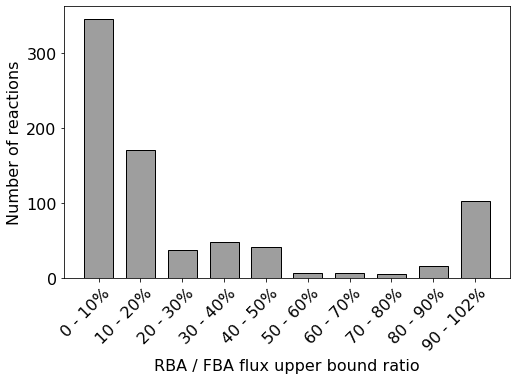

In [4]:
# Slight shift down so that ratio = 1 entries are not assigned to >= 1 bin
for rxn in ub_ratio[ub_ratio == 1.0].index:
    ub_ratio[rxn] = 0.9999
    
# Assign the six glycolysis rxns whose bound ratio is ~102% to be in the last bin
# Bin is labeled accordingly to 90-102%
for rxn in ub_ratio[(ub_ratio > 1) & (ub_ratio < 1.02)].index:
    ub_ratio[rxn] = 0.9999

fig,ax = plt.subplots(figsize=(8,5))
rwidth = 0.7

gap = 0.1
bins = [round(i*gap,1) for i in range(0,11)]
ax.hist(ub_ratio, bins=bins, rwidth=rwidth,
        color='#9e9e9e', edgecolor='k');

yticks = [0, 100, 200, 300]
ax.set_yticks(yticks);
ax.set_yticklabels(yticks, fontsize=16);
ax.set_ylabel('Number of reactions', fontsize=16);

xticks = [(i+0.5)*0.1 for i in range(0, len(bins)-1)]
ax.set_xticks(xticks);

xticklabels = [str(i*10) + ' - ' + str((i+1)*10) + '%' for i in range(0, len(bins)-2)]
xticklabels += ['90 - 102%']
ax.set_xticklabels(xticklabels, fontsize=16);
offset = ScaledTranslation(0.2, 0, fig.dpi_scale_trans)
for label_obj in ax.get_xticklabels():
    label_obj.set_rotation(45)
    label_obj.set_transform(label_obj.get_transform() + offset)
    label_obj.set_horizontalalignment('right')
    
ax.set_xlabel('RBA / FBA flux upper bound ratio', fontsize=16);
#plt.savefig('../../scRBA_figures/components/Fig6_RBAoverFBA_fluxUB_ratio_histogram.png', transparent=True, bbox_inches='tight')

#### Analyze numbers

In [5]:
# Load results
df_fva = pd.read_excel('./results/FVA_RBA_bounds_processed_for_reversibility.xlsx')
df_fva.index = df_fva.rxn.to_list()

# Remove pseudoreaction
df_fva = df_fva[df_fva.subsystem != 'Pseudoreaction']
df_fva = df_fva[df_fva.subsystem != 'Transport']
df_fva = df_fva[df_fva.subsystem != 'Exchange']

# Handle reversible rxns with non-zero reverse flux
#df_fva = df_fva[(df_fva.fva_max > 0) | (df_fva.fva_min < 0)]
#print('Flux-carrying metabolic rxns:', df_fva.shape[0])

# Load pathway assignment
ss_dict = dict()
df_path = pd.read_excel('./input/pathway_regroup.xlsx')

for i in df_path.index:
    p,pgroup = df_path.loc[i, ['Pathway', 'Pathway group']]
    if pd.isnull(p) == False:
        ss_dict[p] = pgroup
ss_dict['Transport'] = 'Transport'
ss_dict['Exchange'] = 'Exchange'
ss_dict['Pseudoreaction'] = 'Pseudoreaction'
        
# Update pathway assignment to result dataframe 
for i in df_fva.index:
    df_fva.loc[i, 'subsystem_group'] = ss_dict[df_fva.subsystem[i]]

In [6]:
ub_ratio = pd.core.series.Series(dtype='float64')
for rxn in df_fva.index:
    rmax,fmax,fmin = df_fva.loc[rxn, ['rba_max', 'fva_max', 'fva_min']]
    if fmax - fmin < 1e-7:
        ub_ratio[rxn] = 1
    else:
        ub_ratio[rxn] = rmax / fmax

In [13]:
516 / 800

0.645

In [12]:
ub_ratio.shape[0]

800

In [7]:
ub_ratio[ub_ratio <= 0.2].shape[0]

516

In [8]:
ub_ratio[ub_ratio > 0.9].shape[0]

120

In [9]:
check = ub_ratio[(ub_ratio >= 0.9998) & (ub_ratio < 1.0002)]
print(check.shape[0])
for rxn in check.index:
    val = check[rxn]
    print(rxn,val)

61
13GS_c 1.0
16GS_c 1.0
3DSPHR_r 1.0
ACGAM6PS_c 1.0
ACGAMPM_c 1.0
AFAT_c 1.0
ALAS_m 1.0
ALATRS_c 1.0
ARGTRS_c 1.0
ASNTRS_c 1.0
ASPTRS_c 1.0
CERH124B_r 1.0
CERH126B_r 1.0
CERH2A24_r 1.0
CERH2A26_r 1.0
CERH324_r 1.0
CERH326_r 1.0
CHTNS_c 1.0
CPPPGO_c 1.0
CYSTRS_c 1.0
DHFS_1_c 1.0
DHNPA2i_m 1.0
DOLPMMT_r 1.0
DOLPMT_c 1.0
FCLT_m 1.0
GLNTRS_c 1.0
GLUTRS_c 1.0
GLYTRS_c 1.0
GTPCI_c 1.0
HEMEOS_m 1.0
HISTRS_c 1.0
HOMOX_m 1.0
ILETRS_c 1.0
IPCS_g 1.0
LEUTRS_c 1.0
LYSTRS_c 1.0
MAN1PT_c 1.0
METTRS_c 1.0
NADS2_c 1.0
NNATi_c 1.0
PHETRS_c 1.0
PNTK_c 1.0
PPBNGD_c 1.0
PPBNGS_1_c 1.0
PPCDC_c 1.0
PPNCL2_c 1.0
PPPGO_m 1.0
PROTRS_c 1.0
RNDR1_c 1.0
RNDR2_c 1.0
SERPT_r 1.0
SERTRS_c 1.0
THRTRS_c 1.0
TRPTRS_c 1.0
TYRTRS_c 1.0
UAGDP_c 1.0
UPP3S_c 1.0
UPPDC1_c 1.0
VALTRS_c 1.0
HCO3E_c_FWD 1.0
HCO3E_n_REV 0.9999762934769927


In [10]:
check = ub_ratio[(ub_ratio > 0.9) & (ub_ratio < 0.9998)]
print(check.shape[0])
for rxn in check.index:
    val = check[rxn]
    print(rxn,val)

36
ADK1_m 0.9933750018732627
ADK3_m 0.9933750018732627
AKP1_c 0.9933750018735209
ALCD25xi_c 0.9769751328817645
ALCD25xi_m 0.9787470419040942
ALCD25yi_c 0.9787395478118548
ALCD2i2_c 0.9817490825741351
CERH124A_r 0.9611209565385623
CERH126A_r 0.9611209565385623
CHORM_c 0.9892873414483468
DHPTS_m 0.9933750018724876
DNMPPA_c 0.9933750018732627
DNTPPA_c 0.9933750018735209
DURIK1_c 0.978574328569647
FECOOR_m 0.9941357592703162
FECRq6_m 0.9941357592703162
FOLD3_m 0.9933750018724876
HPPK2_m 0.9933750018735209
HYPOE_c 0.9785742920583866
NADHK1_c 0.993299027104692
NADK_c 0.9932990271237997
NDPK5_c 0.9784151563573846
NTD1pp_c 0.9785742920583861
NTD5_c 0.9785742920583861
NTP4_c 0.9784151899345888
OHACT5_c 0.9706253857568066
PPND2_c 0.9914913498909688
PPNDH_c 0.9758202008982746
PPYRDC_c 0.979274413611108
PSPHS_r 0.9611209565385623
PYDAMK_c 0.9785742920583866
TMDK1_c 0.9785742920583866
TYRTA_c 0.9914913498909745
DHCRD124_r_FWD 0.9611209565385628
DHCRD126_r_FWD 0.9611209565385628
PHETA1_c_REV 0.97487

In [11]:
check = ub_ratio[(ub_ratio >= 1.0002)]
print(check.shape[0])
for rxn in check.index:
    val = check[rxn]
    print(rxn,val)

23
3HAO_c 1.188098249415142
AHMMPS4_c 875.1888574126534
DB4PS_c 3.40393059490085
DHPPDA2_c 3.4039423984891406
DRAPPRy_c 3.4039423984891406
GTPCII2_c 3.4039423984891406
HKYNH_c 1.1880982494282735
KYN3OX_c 1.1880982494151398
NNDPR_c 1.1880982494208874
PMDPHT_c 3.4039423984891406
QUILSYN_c 1.1880982494246346
RBFSa_c 3.40393059490085
RBFSb_c 3.4039423984891406
THZPSN1_c 875.1888574126534
THZPSN2_c 875.1180358829084
TMDPK_c 875.1652502360718
TMPK_c 875.1888574126534
ENO_c_FWD 1.0150052175313622
GAPD_c_FWD 1.0151739105894244
PGI_c_FWD 1.0183617718957803
PGK_c_FWD 1.0151739105894226
PGM_c_FWD 1.015005217531364
TPI_c_FWD 1.0178574986403464


In [20]:
import cobra
model = cobra.io.load_json_model('../build_GAMS_model/input/GSM_iSace1144_rba.json')

Using license file /home/hvdinh16/Workspace/Softwares/gurobi910/linux64/gurobi.lic
Academic license - for non-commercial use only - expires 2023-07-30


In [34]:
model.reactions.TMDK1_c

Reaction identifier,TMDK1_c
Name,thymidine kinase (ATP:thymidine)
Memory address,0x07fed1bf21f90
Stoichiometry,atp_c + thymd_c --> adp_c + dtmp_c + h_c ATP [cytoplasm] + thymidine [cytoplasm] --> ADP [cytoplasm] + dTMP [cytoplasm] + H+ [cytoplasm]
GPR,
Lower bound,0.0
Upper bound,1000.0


In [16]:
for rxn in ub_ratio[(ub_ratio > 0.9998)].index:
    val = ub_ratio[rxn]
    print(rxn, val)

13GS_c 1.0
16GS_c 1.0
3DSPHR_r 1.0
3HAO_c 1.1964949370855957
ACGAM6PS_c 1.0
ACGAMPM_c 1.0
AFAT_c 1.0
AHMMPS4_c 910.127478753541
ALAS_m 1.0
ALATRS_c 1.0
ARGTRS_c 1.0
ASNTRS_c 1.0
ASPTRS_c 1.0
CERH124B_r 1.0
CERH126B_r 1.0
CERH2A24_r 1.0
CERH2A26_r 1.0
CERH324_r 1.0
CERH326_r 1.0
CHTNS_c 1.0
CPPPGO_c 1.0
CYSTRS_c 1.0
DB4PS_c 3.5416784702549577
DHFS_1_c 1.0
DHNPA2i_m 1.0
DHPPDA2_c 3.541666666666667
DOLPMMT_r 1.0
DOLPMT_c 1.0
DRAPPRy_c 3.541666666666667
FCLT_m 1.0
GLNTRS_c 1.0
GLUTRS_c 1.0
GLYTRS_c 1.0
GTPCII2_c 3.541666666666667
GTPCI_c 1.0
HEMEOS_m 1.0
HISTRS_c 1.0
HKYNH_c 1.1964949370827669
HOMOX_m 1.0
ILETRS_c 1.0
IPCS_g 1.0
KYN3OX_c 1.1964949370988214
LEUTRS_c 1.0
LYSTRS_c 1.0
MAN1PT_c 1.0
METTRS_c 1.0
NADS2_c 1.0
NAMNPP_c 1.196413264821951
NNATi_c 1.0
NNDPR_c 1.196494937096755
PHETRS_c 1.0
PMDPHT_c 3.541666666666667
PNTK_c 1.0
PPBNGD_c 1.0
PPBNGS_1_c 1.0
PPCDC_c 1.0
PPNCL2_c 1.0
PPPGO_m 1.0
PROTRS_c 1.0
QUILSYN_c 1.1964949371083813
RBFSa_c 3.5416784702549577
RBFSb_c 3.541666666666667

In [ ]:
ENO_c_FWD 0.9999
GAPD_c_FWD 0.9999
PGI_c_FWD 0.9999
PGK_c_FWD 0.9999
PGM_c_FWD 0.9999
TPI_c_FWD 0.9999

In [ ]:
for rxn in ub_ratio[(ub_ratio > 0.9998)].index:
    val = ub_ratio[rxn]
    print(rxn, val)

In [13]:
rxns_excl = []
for rxnid in range_ratio[(range_ratio < 0.999) & (range_ratio >= 0.90)].index:
    if rxnid not in rxns_excl:
        rxn = model.reactions.get_by_id(rxnid)
        print(rxnid)
        print(rxn.reaction)
        print(df_fva.name[rxnid])
        print(df_fva.subsystem[rxnid])

ALCD25xi_c
h_c + nadh_c + pacald_c --> 2phetoh_c + nad_c
aldehyde dehydrogenase (2-phenylethanol, NAD)
Phenylalanine, tyrosine and tryptophan metabolism
ALCD25xi_m
h_m + nadh_m + pacald_m --> 2phetoh_m + nad_m
aldehyde dehydrogenase (2-phenylethanol, NAD)
Phenylalanine, tyrosine and tryptophan metabolism
ALCD25yi_c
h_c + nadph_c + pacald_c --> 2phetoh_c + nadp_c
aldehyde dehydrogenase (2-phenylethanol, NADP)
Unassigned
ALCD2i2_c
acald_c + h_c + nadh_c --> etoh_c + nad_c
alcohol dehydrogenase, (acetaldehyde to ethanol)
Pyruvate metabolism
BTDDH_c
btd_c + nad_c <=> actn__R_c + h_c + nadh_c
(R,R)-butanediol dehydrogenase
Butanoate metabolism
CERH124A_r
cer1_24_r + h_r + nadph_r + o2_r --> cer2A_24_r + h2o_r + nadp_r
ceramide-1 hydroxylase (24C)
Sphingolipid biosynthesis
CERH126A_r
cer1_26_r + h_r + nadph_r + o2_r --> cer2A_26_r + h2o_r + nadp_r
ceramide-1 hydroxylase (26C)
Sphingolipid biosynthesis
CHORM_c
chor_c --> pphn_c
chorismate mutase
Phenylalanine, tyrosine and tryptophan metaboli

In [ ]:
rxns_excl = ['ADK1_m','ADK3_m','AKP1_c','DHPTS_m','DNMPPA_c','DNTPPA_c','FOLD3_m','HPPK2_m']

In [23]:
#rxns_check = ['ADK1_m','ADK3_m','ALCD25xi_c','ALCD25xi_m','ALCD25yi_c','CHORM_c','DURIK1_c','NDPK5_c',
#              'NTD1pp_c', 'NTD5_c','NTP4_c','OHACT5_c','PPND2_c','PPNDH_c','PPYRDC_c','TMDK1_c']
rxns_excl = ['ADK1_m','ADK3_m','AKP1_c','DHPTS_m','DNMPPA_c','DNTPPA_c','FOLD3_m','HPPK2_m']
rxns_check = range_ratio[(range_ratio < 0.999) & (range_ratio >= 0.90)].index
for rxn in rxns_check:
    if rxn not in rxns_excl:
        rmin,rmax,fmin,fmax = df_fva.loc[rxn, ['rba_min', 'rba_max', 'fva_min', 'fva_max']]
        print(rxn, rmin, rmax, fmin, fmax)

ALCD25xi_c 0.0 4.31655122 0.0 4.741704963725502
ALCD25xi_m 0.0 4.64001525 0.0 4.741704963725503
ALCD25yi_c 0.0 4.60483569 0.0 4.706839486051044
ALCD2i2_c 0.0 17.78720214 0.0 18.08277316674969
BTDDH_c -8.9241089 0.0 -9.78792309025901 0.0
CERH124A_r 0.0 0.0011613 0.0 0.00120827664
CERH126A_r 0.0 0.0011613 0.0 0.00120827664
CHORM_c 0.13188562 4.98095261 0.09186231959999999 5.031138323480723
DURIK1_c 0.0 209.06045036 0.0 213.376723367647
FECOOR_m 8.08841616 61.47356867 7.534184721835937 61.78250422208488
FECRq6_m 16.17683232 122.94713733 15.06836944367187 123.5650084441698
HYPOE_c 0.0 209.06044277 0.0 213.3767233676471
NADHK1_c 0.0 0.00137589 0.0 0.001385172000006693
NADK_c 0.0 0.00137589 0.0 0.001385171999999824
NDPK5_c 0.00108118 209.02829379 0.0011123736 213.377835741247
NTD1pp_c 0.0 209.06044277 0.0 213.376723367647
NTD5_c 0.0 209.06044277 0.0 213.376723367647
NTP4_c 0.0 209.02721261 0.0 213.3767233676465
OHACT5_c 0.0 3.63925992 0.0 3.91038588944987
PPND2_c 0.09044452 4.65297036 0.0314

In [10]:
range_ratio[range_ratio <= 0.1].shape[0] / range_ratio.shape[0]

0.4015645371577575

In [23]:
range_ratio

13GS_c           1.000000
16GS_c           1.000000
3DSPHR_r         1.000000
3HACD200_rm      0.047266
3HACD220_rm      0.044930
                   ...   
VALTA_m          0.474131
VALTRS_c         1.000000
XPPT_c           0.069831
lumpFACS160_c    0.103825
lumpFACS180_c    0.109492
Length: 767, dtype: float64

In [27]:
import sys
sys.path.append('../../common/')
from custom_functions import make_escher_csv
make_escher_csv(range_ratio, './range_ratio.escher.csv')

In [28]:
make_escher_csv(range_ratio, './range_ratio.escher.csv')

In [24]:
range_ratio_colors = pd.core.series.Series(dtype='int')
for rxn in range_ratio.index:
    range